# Lesson 5. Data-driven Mapping

*Data-driven mapping* refers to the process of using data values to determine the symbology of mapped features. Color, shape, and size are the three most common symbology types used in data-driven mapping.
Data-driven maps are often refered to as thematic maps.


- 5.1 Choropleth Maps
- 5.2 Issues with Visualization
- 5.3 Classification Schemes
- 5.4 Point Maps
- 5.5 Mapping Categorical Data
- 5.6 Recap
- **Exercise**: Data-Driven Mapping

<br>
<font color='grey'>
    <b>Instructor Notes</b>

- Datasets used
    - 'notebook_data/california_counties/CaliforniaCounties.shp'
    - 'notebook_data/alco_schools.csv'
    - 'notebook_data/transportation/BerkeleyBikeBlvds.geojson'
- Expected time to complete
    - Lecture + Questions: 30 minutes
    - Exercises: 15 minutes
</font>


### Types of Thematic Maps

There are two primary types of maps used to convey data values:

- `Choropleth maps`: set the color of areas (polygons) by data value
- `Point symbol maps`: set the color or size of points by data value

We will discuss both of these types of maps in more detail in this lesson. But let's take a quick look at choropleth maps. 

In [1]:
library(sf)
library(tmap)

Linking to GEOS 3.8.0, GDAL 3.0.4, PROJ 6.3.2



# 5.1 Choropleth Maps
Choropleth maps are the most common type of thematic map.

Let's take a look at how we can use an `sf` data.frame to make a choropleth map.

We'll start by reloading our counties dataset from Day 1.

In [2]:
counties = st_read('notebook_data/california_counties/CaliforniaCounties.shp')

Reading layer `CaliforniaCounties' from data source `/home/drew/Desktop/stuff/berk/dlab/Geospatial-Fundamentals-in-R-with-sf/rewrite/notebook_data/california_counties/CaliforniaCounties.shp' using driver `ESRI Shapefile'
Simple feature collection with 58 features and 58 fields
geometry type:  MULTIPOLYGON
dimension:      XY
bbox:           xmin: -374445.4 ymin: -604500.7 xmax: 540038.5 ymax: 450022
projected CRS:  NAD83 / California Albers


In [3]:
head(counties)

ERROR while rich displaying an object: Error in loadNamespace(name): there is no package called ‘geojsonio’

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_geojson.sf(o

FID_ NAME        STATE_NAME POP2010 POP10_SQMI POP2012 POP12_SQMI  WHITE  
1 0    Kern        California  839631  102.9      851089  104.282870  499766
2 0    Kings       California  152982  109.9      155039  111.427421   83027
3 0    Lake        California   64665   48.6       65253   49.082334   52033
4 0    Lassen      California   34895    7.4       35039    7.422856   25532
5 0    Los Angeles California 9818605 2402.3     9904341 2423.264150 4936599
6 0    Madera      California  150865   70.1      153025   71.065672   94456
  BLACK  AMERI_ES geometry                       ⋯ AVG_SALE07 SQMI   
1  48921 12676    MULTIPOLYGON (((193446 -244... ⋯ 1513.53    8161.35
2  11014  2562    MULTIPOLYGON (((12524.03 -1... ⋯ 1203.20    1391.39
3   1232  2049    MULTIPOLYGON (((-240632.1 9... ⋯   72.31    1329.46
4   2834  1234    MULTIPOLYGON (((-45364.03 3... ⋯  120.92    4720.42
5 856874 72828    MULTIPOLYGON (((173874.5 -4... ⋯  187.94    4087.19
6   5629  4136    MULTIPOLYGON (((16681.21 -1... ⋯  579.70    2153.29
  CountyFIPS NEIGHBORS                  PopNeigh NEIGHBOR_1 PopNeigh_1
1 06103      San Bernardino,Tulare,Inyo 2495935  NA         NA        
2 06089      Fresno,Kern,Tulare         2212260  NA         NA        
3 06106      NA                               0  NA         NA        
4 06086      NA                               0  NA         NA        
5 06073      San Bernardino,Kern        2874841  NA         NA        
6 06102      Mono,Fresno                 944652  NA         NA        
  NEIGHBOR_2 PopNeigh_2 geometry                      
1 NA         NA         MULTIPOLYGON (((193446 -244...
2 NA         NA         MULTIPOLYGON (((12524.03 -1...
3 NA         NA         MULTIPOLYGON (((-240632.1 9...
4 NA         NA         MULTIPOLYGON (((-45364.03 3...
5 NA         NA         MULTIPOLYGON (((173874.5 -4...
6 NA         NA         MULTIPOLYGON (((16681.21 -1...

In [4]:
colnames(counties)

[1] "FID_"       "NAME"       "STATE_NAME" "POP2010"    "POP10_SQMI"
 [6] "POP2012"    "POP12_SQMI" "WHITE"      "BLACK"      "AMERI_ES"  
[11] "ASIAN"      "HAWN_PI"    "HISPANIC"   "OTHER"      "MULT_RACE" 
[16] "MALES"      "FEMALES"    "AGE_UNDER5" "AGE_5_9"    "AGE_10_14" 
[21] "AGE_15_19"  "AGE_20_24"  "AGE_25_34"  "AGE_35_44"  "AGE_45_54" 
[26] "AGE_55_64"  "AGE_65_74"  "AGE_75_84"  "AGE_85_UP"  "MED_AGE"   
[31] "MED_AGE_M"  "MED_AGE_F"  "HOUSEHOLDS" "AVE_HH_SZ"  "HSEHLD_1_M"
[36] "HSEHLD_1_F" "MARHH_CHD"  "MARHH_NO_C" "MHH_CHILD"  "FHH_CHILD" 
[41] "FAMILIES"   "AVE_FAM_SZ" "HSE_UNITS"  "VACANT"     "OWNER_OCC" 
[46] "RENTER_OCC" "NO_FARMS07" "AVG_SIZE07" "CROP_ACR07" "AVG_SALE07"
[51] "SQMI"       "CountyFIPS" "NEIGHBORS"  "PopNeigh"   "NEIGHBOR_1"
[56] "PopNeigh_1" "NEIGHBOR_2" "PopNeigh_2" "geometry"

Here's a plain map of our polygons.

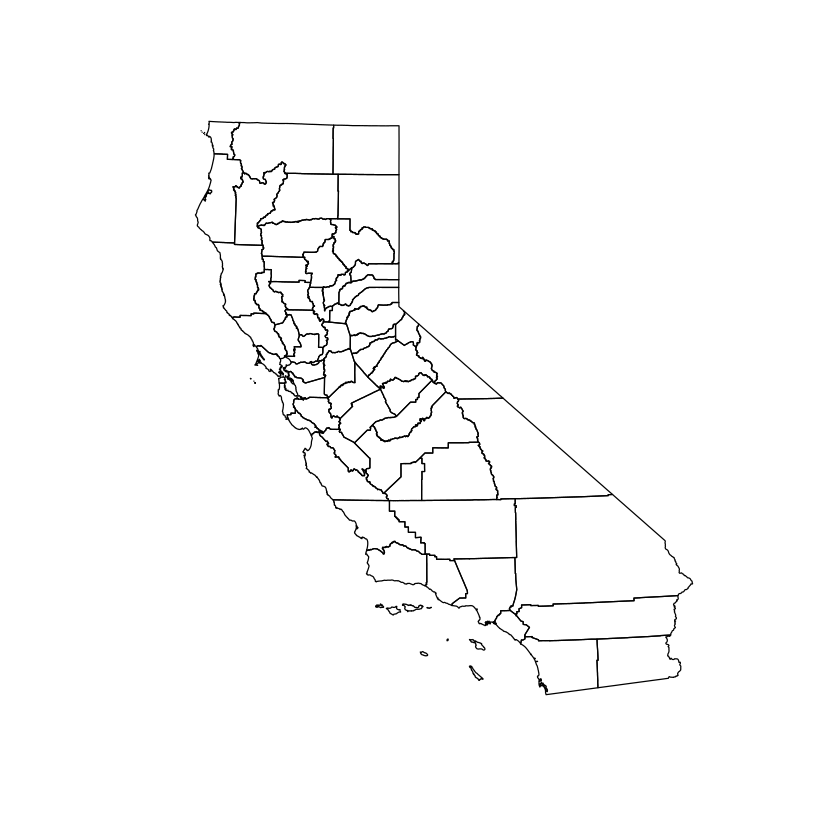

In [5]:
plot(counties$geometry)

Now, for comparison, let's create a choropleth map by setting the color of the county based on the values in the population per square mile (`POP12_SQMI`) column.

First of all, remember that `sf`'s plot method does this by default! So, here's the quickest way to make a choropleth:

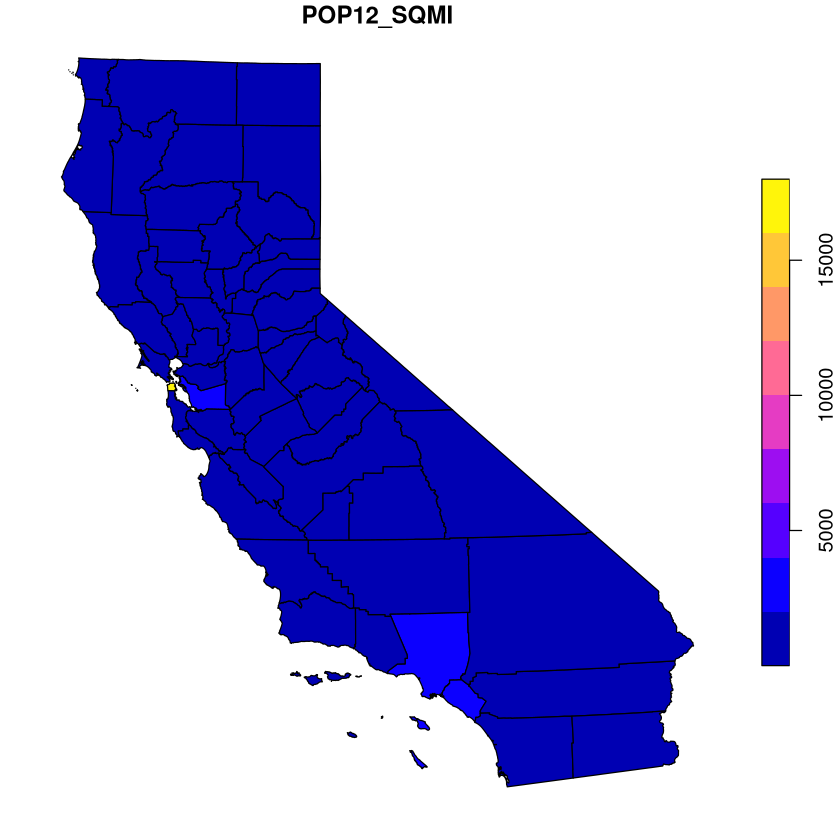

In [6]:
plot(counties['POP12_SQMI'])

However, we can use `tmap`, our nicer mapping package, to do thematic mapping such as this and have greater control over the visualization details.

In `tmap`, instead of setting the `col` argument to a static color identifier (e.g. 'red', '#ef03a5'), we can set it to the name of the column by which we want our polygons colored (e.g. 'POP12_SQMI').

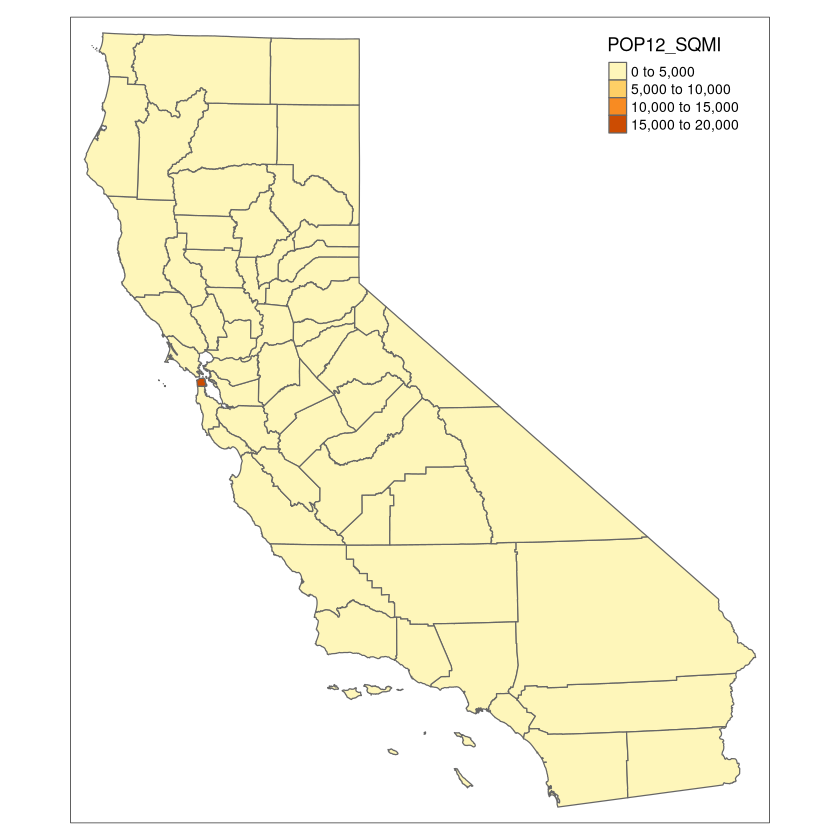

In [7]:
tm_shape(counties) + 
  tm_polygons(col='POP12_SQMI')

Of course, we can also use tmap's interactive mapping mode instead!

(In this case, let's make our layer partially transparent, i.e. `alpha = 0.5`, so that we can see our basemap through our polygons.)

tmap mode set to plotting



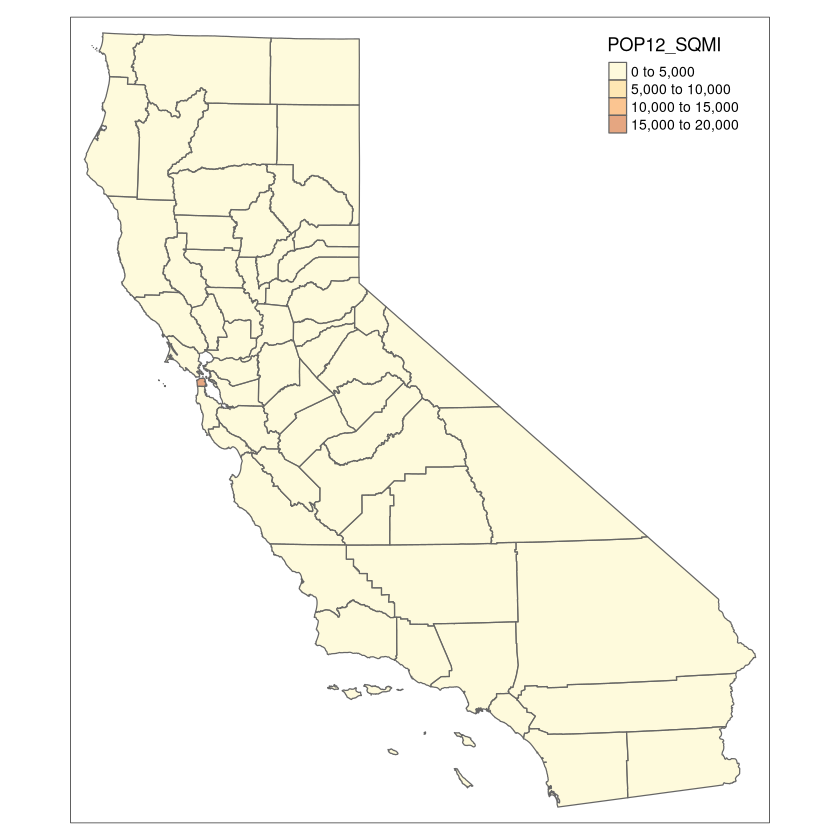

In [10]:
ttm()

tm_shape(counties) +
  tm_polygons(col='POP12_SQMI', alpha=0.5)

That's really the heart of it. To set the color of the features based on the values in a column, set the `col` argument to the column name in the `sf` data.frame (cast as a string!).

---------------------------------------

By default map colors are linearly scaled to data values. This is called a `proportional color map`.

- The great thing about `proportional color maps` is that you can visualize the full range of data values.



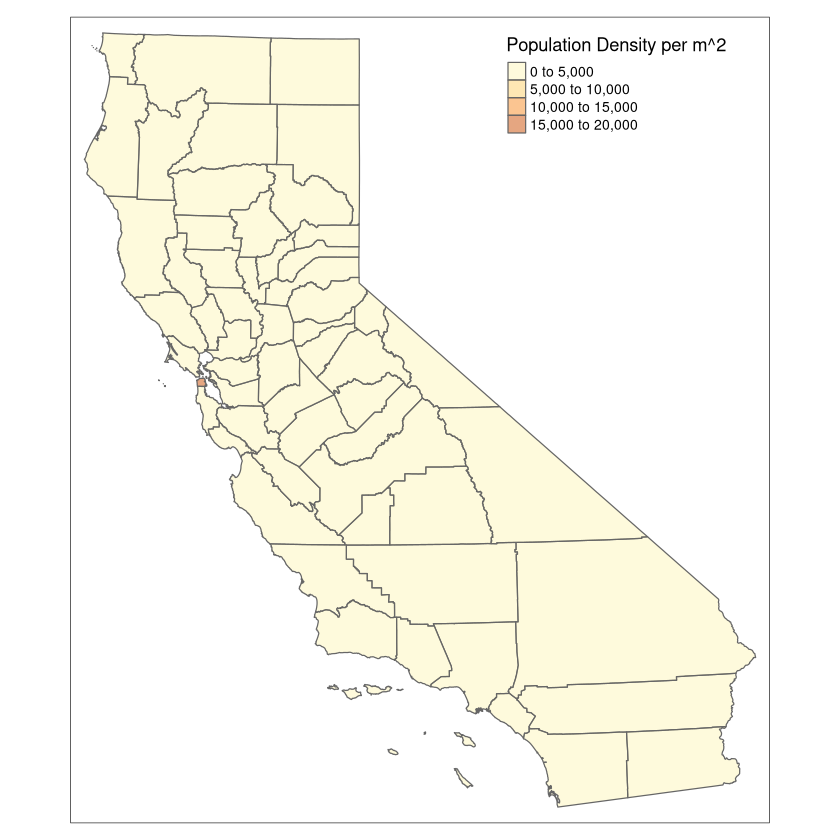

In [12]:
tm_shape(counties) + 
  tm_polygons(col = 'POP12_SQMI', alpha  = 0.5,
              title = "Population Density per mi^2")

<div style="display:inline-block;vertical-align:top;">
    <img src="http://www.pngall.com/wp-content/uploads/2016/03/Light-Bulb-Free-PNG-Image.png" width="30" align=left > 
</div>  
<div style="display:inline-block;">

#### Question
</div>

Why are we plotting `POP12_SQMI` instead of `POP2012`?

### Note: Types of Color Maps

There are a few different types of color maps (or color palettes), each of which has a different purpose:
- *diverging* - a "diverging" set of colors are used so emphasize mid-range values as well as extremes.
- *sequential* - usually with a single color hue to emphasize changes in magnitude, where darker colors typically mean higher values
- *qualitative* - a diverse set of colors to identify categories and avoid implying quantitative significance.

<img src="http://www.gnuplotting.org/figs/colorbrewer.png"></img>

> **Pro-tip**: Sites like [ColorBrewer](https://colorbrewer2.org/#type=sequential&scheme=Blues&n=3) let's you play around with different types of color maps.


# 5.2 Issues with Visualization

### Types of choropleth data

There are several types of quantitative data variables that can be used to create a choropleth map. Let's consider these in terms of our ACS data.

- **Count**
    - counts, aggregated by feature
        - *e.g. population within a census tract*

- **Density**
    - count, aggregated by feature, normalized by feature area
        - *e.g. population per square mile within a census tract*

- **Proportions / Percentages**
    - value in a specific category divided by total value across in all categories
        - *e.g. proportion of the tract population that is white compared to the total tract population*

- **Rates / Ratios**
    - value in one category divided by value in another category
        - *e.g. homeowner-to-renter ratio would be calculated as the number of homeowners (c_owners/ c_renters)*

### Interpretability of plotted data
The goal of a choropleth map is to use color to visualize the spatial distribution of a quantitative variable.

Brighter or richer colors are typically used to signify higher values.

A big problem with choropleth maps is that our eyes are drawn to the color of larger areas, even if the values being mapped in one or more smaller areas are more important.



We see just this sort of problem in our population-density map. 

***Why does our map not look that interesting?*** Take a look at the histogram below, then consider the following question.

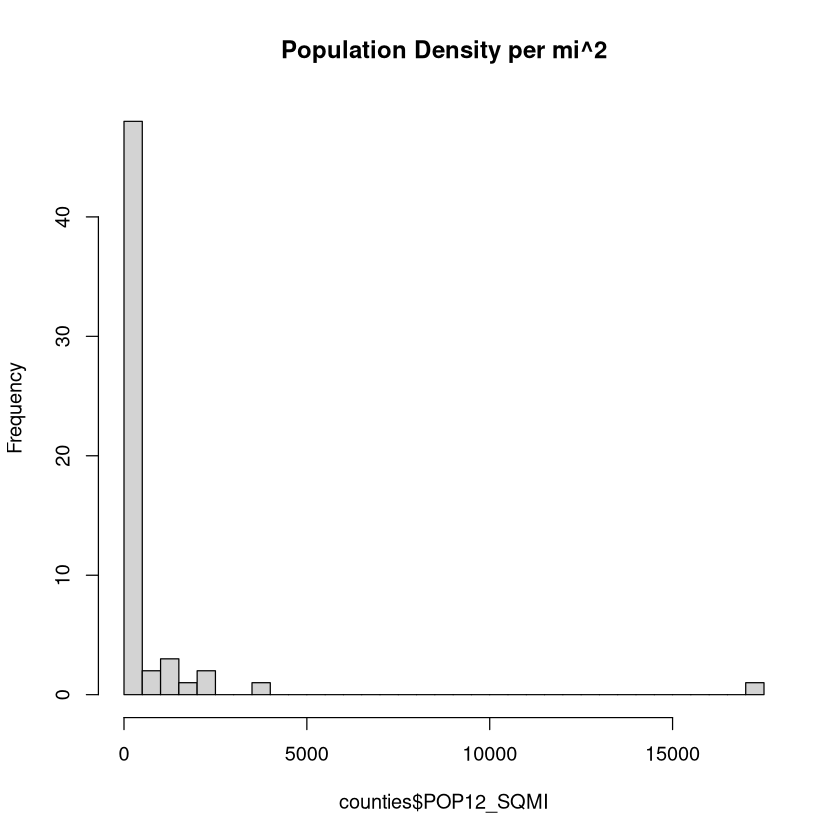

In [14]:
hist(counties$POP12_SQMI,breaks=40, main = 'Population Density per mi^2')

<div style="display:inline-block;vertical-align:top;">
    <img src="http://www.pngall.com/wp-content/uploads/2016/03/Light-Bulb-Free-PNG-Image.png" width="30" align=left > 
</div>  
<div style="display:inline-block;">

#### Question
</div>

What county does that outlier represent? What problem does that pose?

# 5.3 Classification schemes

Let's try to make our map more interpretable!

The common alternative to a proportionial color map is to use a **classification scheme** to create a **graduated color map**. This is the standard way to create a **choropleth map**.

A **classification scheme** is a method for binning continuous data values into 4-7 classes (the default is 5) and map those classes to a color palette. 

### The commonly used classifications schemes:

- **Equal intervals**
    - equal-size data ranges (e.g., values within 0-10, 10-20, 20-30, etc.)
    - <u>pros</u>:
        - best for data spread across entire range of values
        - easily understood by map readers
    - <u>cons</u>:
        - but avoid if you have highly skewed data or a few big outliers
 
 
- **Quantiles**
    - equal number of observations in each bin
    - <u>pros</u>:
        - looks nice, becuase it best spreads colors across full set of data values
        - thus, it's often the default scheme for mapping software
    - <u>cons</u>:
        - bin ranges based on the number of observations, not on the data values
        - thus, different classes can have very similar or very different values.
 
 
- **Natural breaks**
    - minimize within-class variance and maximize between-class differences
    - e.g. 'fisher-jenks'
    - </u>pros</u>:
        - great for exploratory data analysis, because it can identify natural groupings
    - <u>cons</u>:
        - class breaks are best fit to one dataset, so the same bins can't always be used for multiple years
 
 
- **Manual** 
    - classifications are user-defined
    - <u>pros</u>: 
        - especially useful if you want to slightly change the breaks produced by another scheme
        - can be used as a fixed set of breaks to compare data over time
    - <u>cons</u>:
        - more work involved

### Classification schemes and `sf` data.frames

Classification schemes can be implemented using the `tmap` geometry functions (`tm_polygons`, `tm_dots`, etc.) by setting a value for the **style** argument.

Here is a list of some of the `classification styles` names that we could use (from the docs: `?tm_polygons`):
-  `equal`, `quantile`,`fisher`, `jenks`,`fixed`, `kmeans`, `pretty`.

For more information about these classification schemes see sources such as [this page](https://geocompr.robinlovelace.net/adv-map.html) in the Lovelace, Nowosad, and Muenchow ebook, or check out the help docs.

--------------------------

### Classification schemes in action

Let's redo the last map using the `quantile` classification scheme.

- What is different about the code? About the output map?

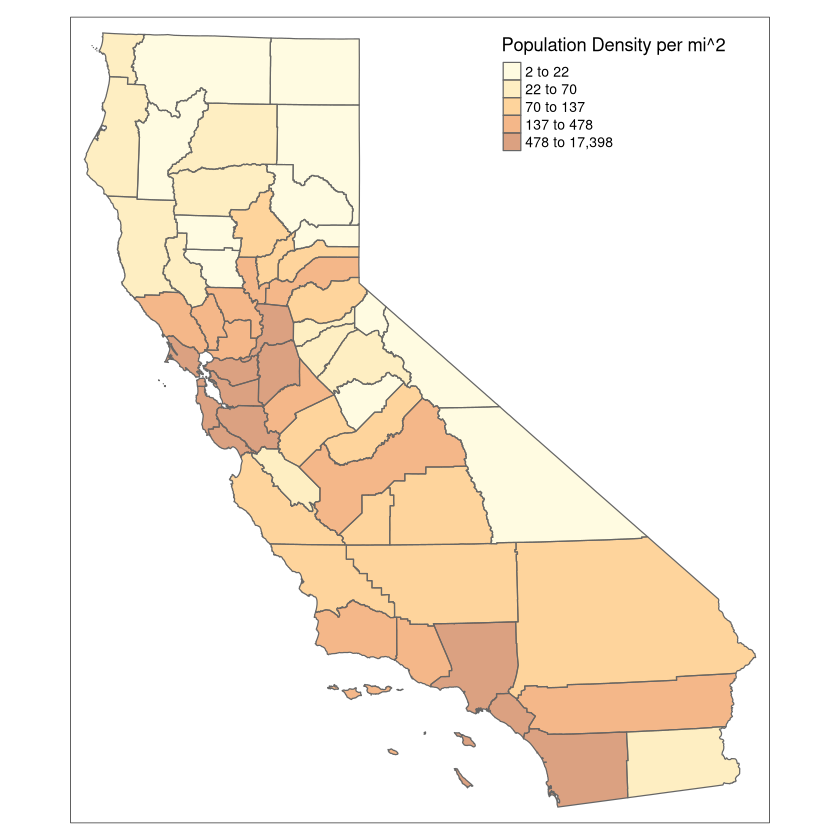

In [18]:
# Plot population density - mile^2
tm_shape(counties) + 
  tm_polygons(col = 'POP12_SQMI',
              style="quantile",
              alpha=0.5,
              title="Population Density per mi^2")

### User Defined Classification Schemes

You may get pretty close to your final map without being completely satisfied. In this case you can manually define a classification scheme.

Let's customize our map with a `user-defined` classification scheme where we manually set the breaks for the bins using the `classification_kwds` argument.

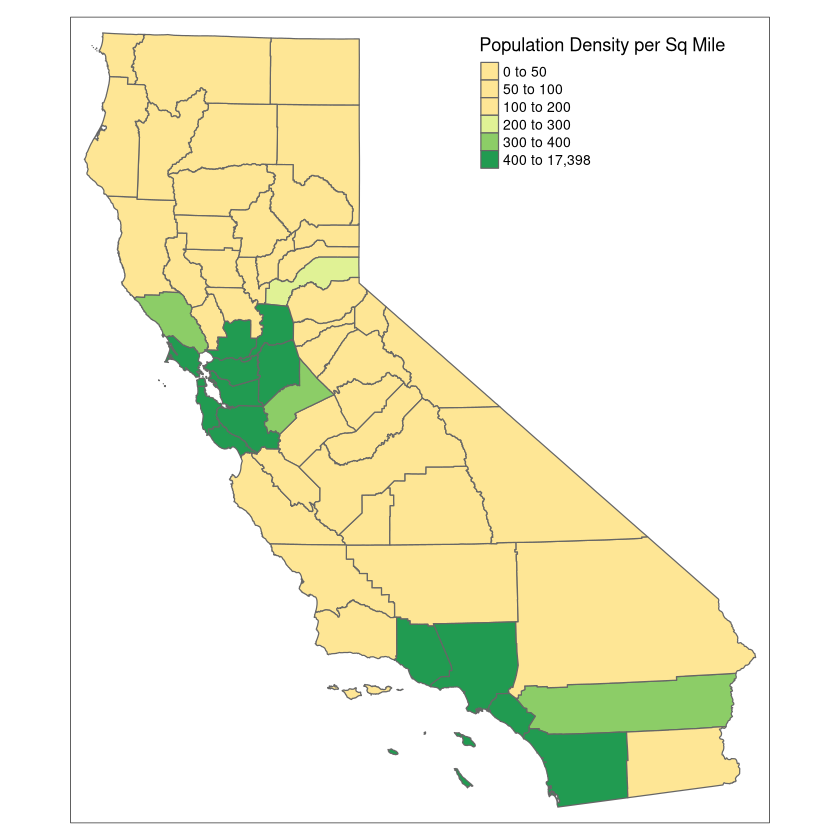

In [26]:
# TODO: WHY RDYLGN NOT WORKING??

tm_shape(counties) + 
  tm_polygons(col = 'POP12_SQMI',
              palette = "RdYlGn", 
              style='fixed',
              breaks = c(0, 50, 100, 200, 300, 400, max(counties$POP12_SQMI)),
              title = "Population Density per Sq Mile")

Since we are customizing our plot, we can also edit our legend to specify and format the text so that it's easier to read.

- We'll use `legend_labels_list` to customize the labels for group in the legend.

In [ ]:
#TODO: TRANSLATE TO R!

fig, ax = plt.subplots(figsize = (14,8)) 
counties.plot(column='POP12_SQMI',
                    legend=True, 
                    cmap="RdYlGn", 
                    scheme='user_defined', 
                    classification_kwds={'bins':[50,100,200,300,400]},
                    ax=ax)

# Create the labels for the legend
legend_labels_list = ['<50','50 to 100','100 to 200','200 to 300','300 to 400','>400']

# Apply the labels to the plot
for j in range(0,len(ax.get_legend().get_texts())):
        ax.get_legend().get_texts()[j].set_text(legend_labels_list[j])

ax.set_title("Population Density per Sq Mile")

### Let's plot a ratio

If we look at the columns in our dataset, we see we have a number of variables
from which we can calculate proportions, rates, and the like.

Let's try that out:

In [34]:
head(counties)

ERROR while rich displaying an object: Error in vapply(part, function(col) {: values must be length 6,
 but FUN(X[[10]]) result is length 2

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[

In [41]:
?tm_polygons

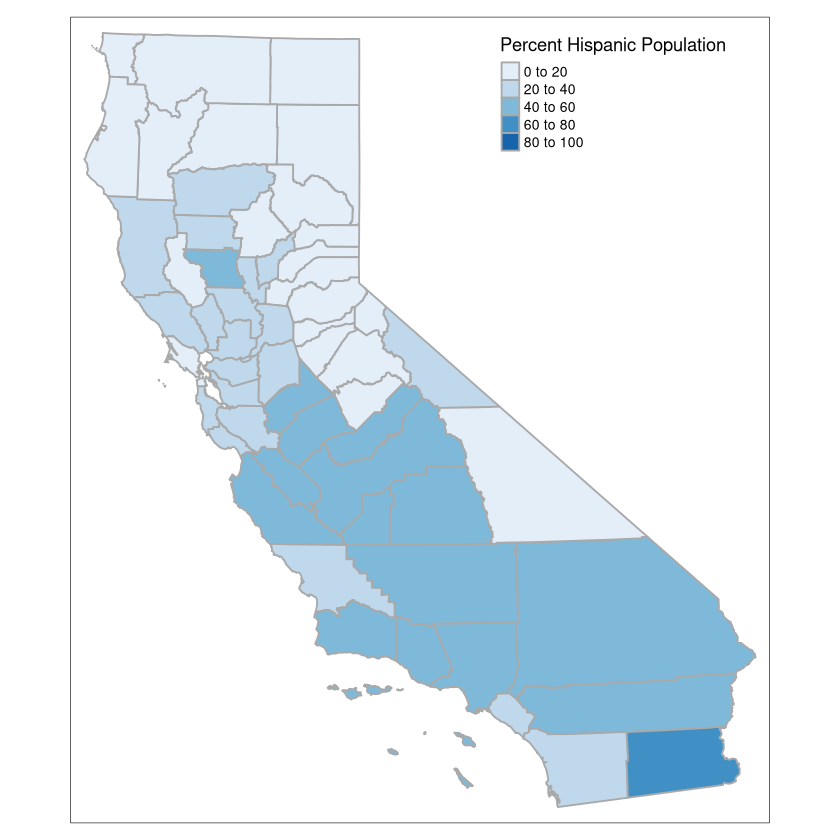

In [45]:
# calculate percent hispanic as a new column
counties$pct_hispanic = counties$HISPANIC/counties$POP2012 * 100

# Plot percent hispanic as choropleth
tm_shape(counties) + 
  tm_polygons(col = 'pct_hispanic',
              palette = 'Blues', 
              style = 'fixed',
              breaks= c(0,20,40,60,80,100),
              border.col = "darkgrey",
              lwd = 1.5,
              title = "Percent Hispanic Population")

# TODO: TRANSLATE THIS
#legend_labels_list = ['<20%','20% - 40%','40% - 60%','60% - 80%','80% - 100%']


<div style="display:inline-block;vertical-align:top;">
    <img src="http://www.pngall.com/wp-content/uploads/2016/03/Light-Bulb-Free-PNG-Image.png" width="30" align=left > 
</div>  
<div style="display:inline-block;">

#### Questions
</div>

1. What new options and operations have we added to our code?
1. Based on our code, what title would you give this plot to describe what it displays?
1. How many values do we specify in the `breaks` vector, and how many bins are in the map legend? Why?

# 5.4 Point maps

Choropleth maps are great, but mapping using point symbols enables us to visualize our spatial data in another way. 

If you know both mapping methods you can expand how much information you can show in one map. 

For example, point maps are a great way to map `counts` because the varying sizes of areas are deemphasized.



-----------------------
Let's read in some point data on Alameda County schools.

In [52]:
schools_df = read.csv('notebook_data/alco_schools.csv')
head(schools_df)

,X,Y,Site,Address,City,State,Type,API,Org
,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>
1,-122.2388,37.74476,Amelia Earhart Elementary,400 Packet Landing Rd,Alameda,CA,ES,933,Public
2,-122.2519,37.73900,Bay Farm Elementary,200 Aughinbaugh Way,Alameda,CA,ES,932,Public
3,-122.2589,37.76206,Donald D. Lum Elementary,1801 Sandcreek Way,Alameda,CA,ES,853,Public
4,-122.2348,37.76525,Edison Elementary,2700 Buena Vista Ave,Alameda,CA,ES,927,Public
5,-122.2381,37.75396,Frank Otis Elementary,3010 Fillmore St,Alameda,CA,ES,894,Public
6,-122.2616,37.76911,Franklin Elementary,1433 San Antonio Ave,Alameda,CA,ES,893,Public


We got it from a plain CSV file, let's coerce it to an `sf` data.frame.

In [53]:
schools_sf = st_as_sf(schools_df, 
                      coords = c('X','Y'),
                      crs = 4326)

Then we can map it.

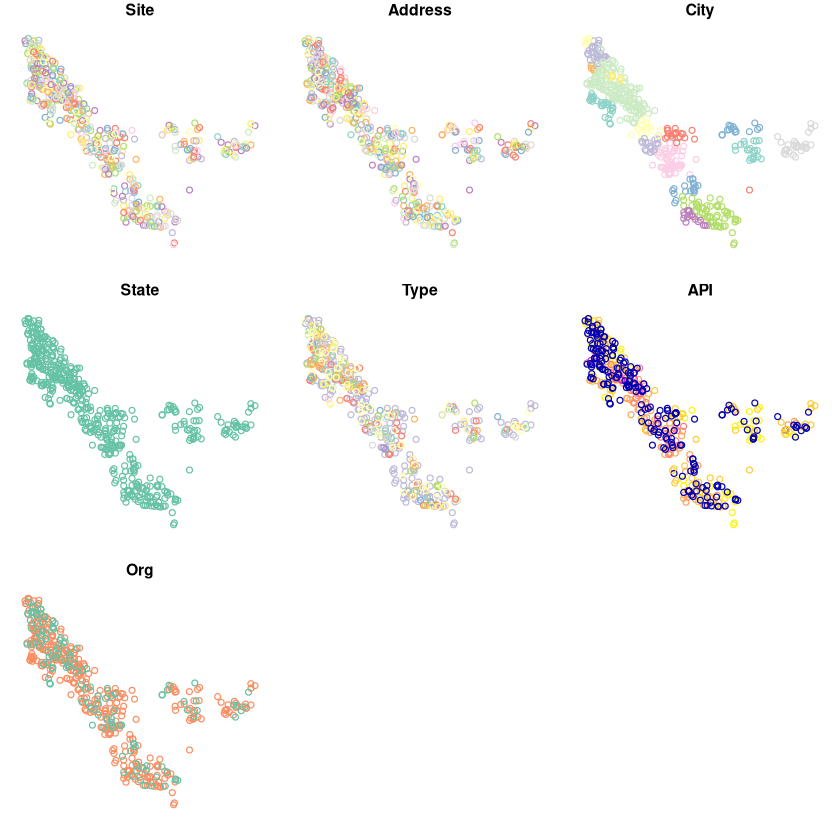

In [54]:
plot(schools_sf)

### Proportional Color Maps
**Proportional color maps** linearly scale the `color` of a point symbol by the data values.

Let's try this by creating a map of `API`. API stands for *Academic Performance Index*, which is a measurement system that looks at the performance of an individual school.

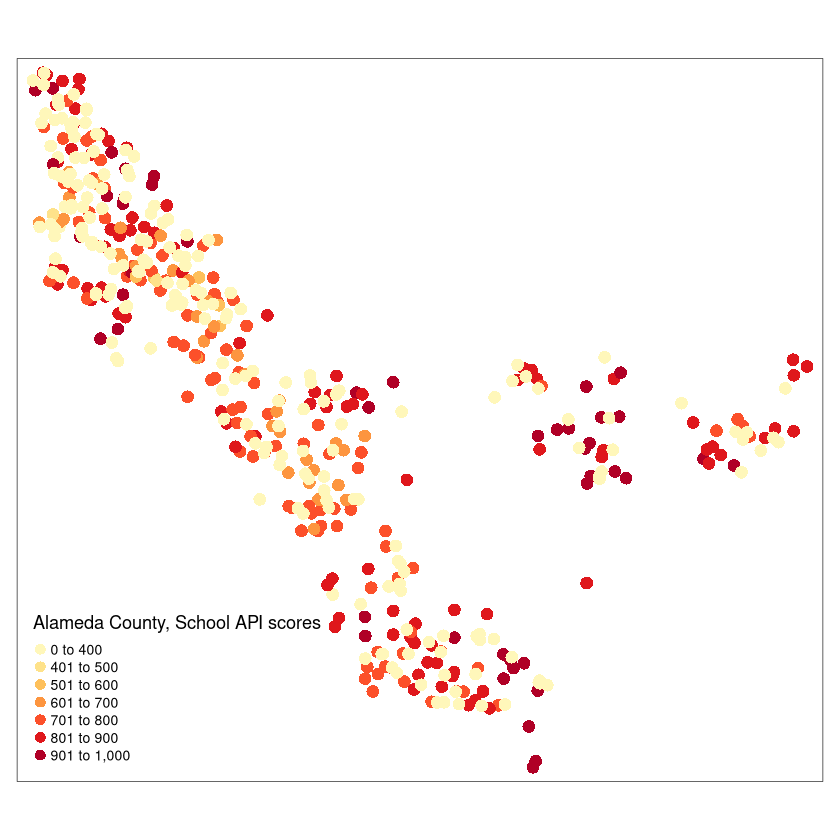

In [66]:
tm_shape(schools_gdf) + 
  tm_dots(col="API", palette="YlOrRd", size=0.5,
          title="Alameda County, School API scores")

When you see that continuous color bar in the legend you know that the mapping of data values to colors is not classified.


### Graduated Color Maps

We can also create **graduated color maps** by binning data values before associating them with colors. These are just like choropleth maps, except that the term "choropleth" is only used with polygon data. 

Graduated color maps use the same syntax as the choropleth maps above - you create them by setting a value for `scheme`. 

Below, we copy the code we used above to create a choropleth, but we change the name of the geodataframe to use the point gdf. 

In [ ]:
fig, ax = plt.subplots(figsize = (15,6)) 

# Plot percent non-white with graduated colors
schools_gdf.plot(column='API', 
                        legend=True, 
                        cmap="Blues",
                        scheme='user_defined', 
                        classification_kwds={'bins':[0,200,400,600,800]},
                        edgecolor="grey",
                        linewidth=0.5,
                        #markersize=60,
                        ax=ax)

# Create a custom legend
legend_labels_list = ['0','0 - 200','200 - 400','400 - 600','600 - 800','>800']

# Apply the legend to the map
for j in range(0,len(ax.get_legend().get_texts())):
        ax.get_legend().get_texts()[j].set_text(legend_labels_list[j])

# Create the plot
plt.tight_layout()
plt.title("Alameda County, School API scores")

As you can see, the syntax for a choropleth and graduated color map is the same,
although some options only apply to one or the other.

For example, uncomment the `markersize` parameter above to see how you can further customize a graduated color map.

### Graduated symbol maps

`Graduated symbol maps` are also a great method for mapping points.  These are just like graduated color maps but instead of associating symbol color with data values they associate point size. Similarly,graduated symbol maps use `classification schemes` to set the size of point symbols. 

> We demonstrate how to make graduated symbol maps along with some other mapping techniques in the `Optional Mapping notebook` which we encourage you to explore on your own. (***Coming Soon***)

## 5.5 Mapping Categorical Data

Mapping categorical data, also called qualitative data, is a bit more straightforward. There is no need to scale or classify data values. The goal of the color map is to provide a contrasting set of colors so as to clearly delineate different categories. Here's a point-based example:

In [ ]:
schools_gdf.plot(column='Org', cmap='bwr',categorical=True, legend=True)

## 5.6 Recap
We learned about important data driven mapping strategies and mapping concepts
- Choropleth Maps
- Point maps
- Color schemes 
- Classifications

# Exercise: Data-Driven Mapping

Point and polygons are not the only geometry-types that we can use in data-driven mapping!

Run the next cell to load a dataset containing Berkeley's bicycle boulevards (which we'll be using more in the following notebook).

Then in the following cell, write your own code to:
1. plot the bike boulevards;
2. color them by status (find the correct column in the head of the dataframe, displayed below);
3. color them using a fitting, good-looking qualitative colormap that you choose from [The Matplotlib Colormap Reference](https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html);
4. set the line width to 5 (check the plot method's documentation to find the right argument for this!);
4. add the argument `figsize=[20,20]`, to make your map nice and big and visible!
    
Then answer the questions posed in the last cell.

<br>


To see the solution, double-click the Markdown cell below.


In [ ]:
bike_blvds = gpd.read_file('notebook_data/transportation/BerkeleyBikeBlvds.geojson')
bike_blvds.head()

In [ ]:
# YOUR CODE HERE:






## Double-click to see solution!

<!--

# SOLUTION:

bike_blvds.plot(column='Status', cmap='Dark2', linewidth=5, legend=True, figsize=[20,20])

-->

-------------------------------------

<div style="display:inline-block;vertical-align:top;">
    <img src="http://www.pngall.com/wp-content/uploads/2016/03/Light-Bulb-Free-PNG-Image.png" width="30" align=left > 
</div>  
<div style="display:inline-block;">

#### Questions
</div>

1. What does that map indicate about the status of the Berkeley bike boulevards?
1. What does that map indicate about the status of your Berkeley bike-boulevard *dataset*?

---
<div style="display:inline-block;vertical-align:middle;">
<a href="https://dlab.berkeley.edu/" target="_blank"><img src ="assets/images/dlab_logo.png" width="75" align="left">
</a>
</div>

<div style="display:inline-block;vertical-align:middle;">
    <div style="font-size:larger">&nbsp;D-Lab @ University of California - Berkeley</div>
    <div>&nbsp;Team Geo<div>
</div>
        


